# Module 3: Machine Learning

## Sprint 1: Basic Machine Learning

## House prices regression competition

## Background

---

Participating in Kaggle competitions is an efficient way to learn some aspects of Machine Learning. You can read solutions made public by the others, participate in the discussions to talk about solution ideas and test them by submitting them for evaluation.

The metric used for evaluation can vary from competition to competition, but the idea remains the same - build a model that is as accurate as possible on the testing set. In industry, there are other factors to consider when building machine learning models - inference time, solution complexity, maintainability and so on. However, even though you only learn a subset of the required skills while participating in Kaggle competitions, it is quite a fun way to learn by doing it, so let's participate in one of the tutorial competitions now!

## The competition

In the previous notebooks, we learned about some very important ML topics:

- Optimizing an objective
- Training, validation, testing sets
- Feature engineering
- Logistic regression model
- Linear regression model
- Random forest model
- Interpreting the model by looking at the important features

In this notebook we will practice all the above concepts by participating in another Kaggle competition:

- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

Read the overview and look at the evaluation section (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation). The target to predict is a continuous variable and hence we will build regression models.

Give extra attention to the evaluation metric - the RMSE is computed between the logarithm of the predicted value and the logarithm of the observed sales price, not the raw prices.

Now look at the data section - inspect the columns that are available. Download the data and start with exploratory data analysis, similar to the one you used in the previous notebooks. Select some features, maybe do some feature engineering and build linear regression and random forest models using sklearn.

For help, you can look at some of the notebooks by other competitors. However, try to write code by yourself, as even though you will always be able to consult external resources while working as a professional, the main thing right now is to learn by first trying it yourself. These two notebooks could be useful:

- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python for exploratory data analysis
- https://www.kaggle.com/marcelopesse/house-prices-machine-learning-with-sklearn using random forests for regression

---

## Concepts to explore

- Linear regression https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- Random forest regressor https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- Root mean squared error https://en.wikipedia.org/wiki/Root-mean-square_deviation

## Requirements

- Train, validate (using a dedicated validation set) and submit a linear regression model
- Train, validate (using a dedicated validation set) and submit a random forest regressor model
- Achieve a score better than 0.14 on the public leaderboard

## Evaluation criteria

- Public leaderboard score
- How simple is the model
- Code quality


## Sample correction questions

During a correction, you may get asked questions that test your understanding of covered topics.

- What factors determine whether you should use machine learning for a given problem?
- What factors determine what kind of machine learning model should be used for a given problem?
- What are some possible ways to make sure that your model will perform well on previously unseen samples?
- What factors make a machine learning model useful?

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from pandas.api.types import CategoricalDtype
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [134]:
train_data = pd.read_csv('https://raw.githubusercontent.com/TuringCollegeSubmissions/ajanus-DS.3.1/master/train.csv?token=ALINPS3ZE2BT4LIY3P7CWADAV2IOW', index_col="Id")
test_data = pd.read_csv('https://raw.githubusercontent.com/TuringCollegeSubmissions/ajanus-DS.3.1/master/test.csv?token=ALINPS5SAPIQ2ZAMYXGQWULAV2IRC', index_col="Id")

In [135]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [136]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [137]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [138]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0
BsmtFinSF2,1458.0,52.619342,176.753926,0.0,0.00,0.0,0.00,1526.0


* We see that we have a lot of missing values. We will need to deal with those. 
* Also, variabale GarageYrBlt has not only missing values, but also some errors since max GarageYrBlt in test data is 2207, so, since YearBuilt variable does not have missing data we could GarageYrBlt equal to the same as the House build year (YearBuilt). 
* What's more, it is interesting to see, that none of the datasets have OverallCondition equal to 10, even though it says so in the data_description file, the highest value for this variable is 9.

In [139]:
test_data['GarageYrBlt']

Id
1461    1961.0
1462    1958.0
1463    1997.0
1464    1998.0
1465    1992.0
         ...  
2915       NaN
2916    1970.0
2917    1960.0
2918       NaN
2919    1993.0
Name: GarageYrBlt, Length: 1459, dtype: float64

In [140]:
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].where(test_data['GarageYrBlt'] <= 2010, test_data['YearBuilt'])

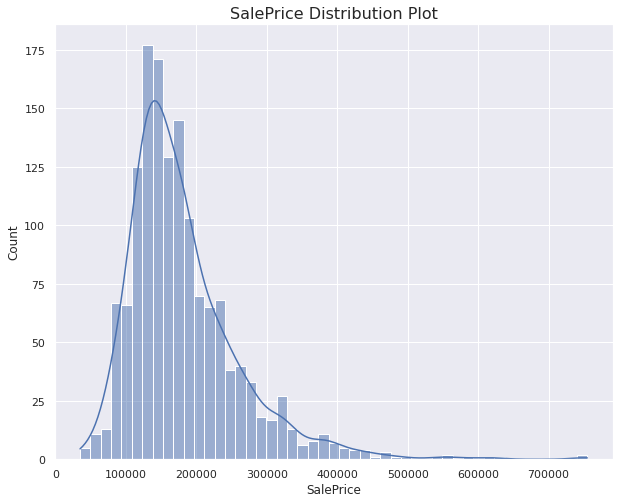

In [141]:
fig, ax = plt.subplots(figsize=(10, 8))
fig = sns.histplot(train_data['SalePrice'], kde=True);
fig.set_title("SalePrice Distribution Plot", fontsize=16);

As we can see from the chart, house prices distribution is right-skewed.

Now let's prepare our data for the baseline model creation. We will start off, by checking after categorical variables and from data_description file looking which ones should be ordinal and which ones not. For example, MSSubClass is of type int, even though it is actually a categorical variable.

In [142]:
nominal_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig',
                          'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                          'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                          'Heating', 'CentralAir', 'Electrical', 'GarageType', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

ten_levels = list(range(1,10))
five_levels = ['Po', 'Fa', 'TA', 'Gd', 'Ex']


ordinal_features = {
    'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
    'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
    'LandSlope': ['Gtl', 'Mod', 'Sev'],
    'OverallQual': ten_levels,
    'OverallCond': ten_levels,
    'ExterQual': five_levels,
    'ExterCond': five_levels,
    'BsmtQual': five_levels,
    'BsmtCond': five_levels,
    'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': five_levels,
    'KitchenQual': five_levels,
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'FireplaceQu': five_levels,
    'GarageFinish': ['Unf', 'RFn', 'Fin'],
    'GarageQual': five_levels,
    'GarageCond': five_levels,
    'PavedDrive': ['N', 'P', 'Y'],
    'PoolQC': five_levels,
}

ordinal_features = {key: ['None'] + value for key, value in
                  ordinal_features.items()}

def encode(df: pd.DataFrame):
  "Correctly encodes the categorical variables inside dataframe"
  
  for feature in nominal_features:
    df[feature] = df[feature].astype("category")
    if 'None' not in df[feature].cat.categories:
      df[feature].cat.add_categories('None', inplace=True)
  for feature, levels in ordinal_features.items():
    df[feature] = df[feature].astype(CategoricalDtype(levels, ordered=True))
  return df

In [143]:
def fill_missing_values(df: pd.DataFrame) -> pd.DataFrame:
  "Fills in missing values in a dataframe base on column type"

  for feature in df.select_dtypes('number'):
        df[feature] = df[feature].fillna(0)
  for feature in df.select_dtypes('category'):
      df[feature] = df[feature].fillna('None')
  return df

In [144]:
def process_initial_data(initial_tain_df: pd.DataFrame, initial_test_df: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
  df = pd.concat([initial_tain_df, initial_test_df])
  df = encode(df)
  df = fill_missing_values(df)
  df_train = df.loc[initial_tain_df.index, :]
  df_test = df.loc[initial_test_df.index, :]
  return df_train, df_test  

In [145]:
train_df, test_df = process_initial_data(train_data, test_data)

In [146]:
def get_score(X: pd.DataFrame, y: pd.Series, model = LinearRegression()):
  for colname in X.select_dtypes(["category"]):
    X[colname] = X[colname].cat.codes
  log_y = np.log(y)
  score = cross_val_score(
          model, X, log_y, cv=5, scoring="neg_mean_squared_error",
      )
  score = -1 * score.mean()
  score = np.sqrt(score)
  return score

In [147]:
X = train_df.copy()
y = X.pop('SalePrice')

In [148]:
baseline_lreg_score = get_score(X, y)
print('Our Baseline Model Score using Linear Regression model is: ', "{:.4f}".format(baseline_lreg_score))

Our Baseline Model Score using Linear Regression model is:  0.1523


In [149]:
baseline_rforest_score = get_score(X, y, model=RandomForestRegressor(random_state=0))
print('Our Baseline Model Score using Random Forest Regressor is: ', "{:.4f}".format(baseline_rforest_score))

Our Baseline Model Score using Random Forest Regressor is:  0.1397


In [150]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5,3,65.0,8450,1,2,1,3,4,4,1,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,4,3,2,4,3,1,6,706.0,1,0.0,150.0,856.0,1,5,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,8,0,0,1,2003.0,2,2.0,548.0,3,3,3,0,61,0,0,0,0,0,4,4,0,2,2008,8,4
2,0,3,80.0,9600,1,2,1,3,4,2,1,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,3,1,4,3,4,5,978.0,1,0.0,284.0,1262.0,1,5,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,8,1,3,1,1976.0,2,2.0,460.0,3,3,3,298,0,0,0,0,0,0,4,4,0,5,2007,8,4
3,5,3,68.0,11250,1,2,2,3,4,4,1,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,4,3,2,4,3,2,6,486.0,1,0.0,434.0,920.0,1,5,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,4,6,8,1,3,1,2001.0,2,2.0,608.0,3,3,3,0,42,0,0,0,0,0,4,4,0,9,2008,8,4
4,6,3,60.0,9550,1,2,2,3,4,0,1,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,3,0,3,4,1,5,216.0,1,0.0,540.0,756.0,1,4,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,4,7,8,1,4,5,1998.0,1,3.0,642.0,3,3,3,0,35,272,0,0,0,0,4,4,0,2,2006,8,0
5,5,3,84.0,14260,1,2,2,3,4,2,1,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,4,3,2,4,3,3,6,655.0,1,0.0,490.0,1145.0,1,5,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,4,9,8,1,3,1,2000.0,2,3.0,836.0,3,3,3,192,84,0,0,0,0,0,4,4,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,5,3,62.0,7917,1,2,1,3,4,4,1,8,2,2,0,5,6,5,1999,2000,1,1,12,13,2,0.0,3,3,2,4,3,1,1,0.0,1,0.0,953.0,953.0,1,5,1,4,953,694,0,1647,0.0,0.0,2,1,3,1,3,7,8,1,3,1,1999.0,2,2.0,460.0,3,3,3,0,40,0,0,0,0,0,4,4,0,8,2007,8,4
1457,0,3,85.0,13175,1,2,1,3,4,4,1,14,2,2,0,2,6,6,1978,1988,1,1,9,10,3,119.0,3,3,1,4,3,1,5,790.0,3,163.0,589.0,1542.0,1,3,1,4,2073,0,0,2073,1.0,0.0,2,0,3,1,3,7,7,2,3,1,1978.0,1,2.0,500.0,3,3,3,349,0,0,0,0,0,0,2,4,0,2,2010,8,4
1458,6,3,66.0,9042,1,2,1,3,4,4,1,6,2,2,0,5,7,9,1941,2006,1,1,5,5,2,0.0,5,4,4,3,4,1,6,275.0,1,0.0,877.0,1152.0,1,5,1,4,1188,1152,0,2340,0.0,0.0,2,0,4,1,4,9,8,2,4,1,1941.0,2,1.0,252.0,3,3,3,0,60,0,0,0,0,0,0,2,2500,5,2010,8,4


In [151]:
def create_submission_file(test_df: pd.DataFrame, model=RandomForestRegressor(random_state=0)):
  for colname in test_df.select_dtypes(["category"]):
    test_df[colname] = test_df[colname].cat.codes
  preds = pd.Series(np.exp(model.predict(test_df)))
  submission_df = pd.DataFrame({'Id': test_df.index, 'SalePrice': preds})
  submission_df.to_csv('submission.csv', index=False)

Create the submission file

In [153]:
# reg = RandomForestRegressor(random_state=0)
# reg.fit(X,np.log(y))
# test_df.pop('SalePrice')
# create_submission_file(test_df.copy(), model=reg)

In [156]:
test_df.select_dtypes(["category"])

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,None,MnPrv,None,WD,Normal
1462,20,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,None,Attchd,Unf,TA,TA,Y,None,None,Gar2,WD,Normal
1463,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,None,MnPrv,None,WD,Normal
1464,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal
1465,120,RL,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,None,None,None,None,None,Y,None,None,None,WD,Normal
2916,160,RM,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,None,CarPort,Unf,TA,TA,Y,None,None,None,WD,Abnorml
2917,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
